Epoch 1/5
442/442 ━━━━━━━━━━━━━━━━━━━━ 278s 576ms/step - accuracy: 0.3132 - loss: 2.3993 - val_accuracy: 0.8708 - val_loss: 0.4884
Epoch 2/5
442/442 ━━━━━━━━━━━━━━━━━━━━ 259s 557ms/step - accuracy: 0.7022 - loss: 0.8533 - val_accuracy: 0.9195 - val_loss: 0.3223
Epoch 3/5
442/442 ━━━━━━━━━━━━━━━━━━━━ 257s 554ms/step - accuracy: 0.7856 - loss: 0.6237 - val_accuracy: 0.9343 - val_loss: 0.2296
Epoch 4/5
442/442 ━━━━━━━━━━━━━━━━━━━━ 272s 586ms/step - accuracy: 0.8258 - loss: 0.5092 - val_accuracy: 0.9473 - val_loss: 0.2077
Epoch 5/5
442/442 ━━━━━━━━━━━━━━━━━━━━ 2869s 6s/step - accuracy: 0.8376 - loss: 0.4657 - val_accuracy: 0.9541 - val_loss: 0.1962
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 566ms/step - accuracy: 0.9572 - loss: 0.1949
Test Accuracy: 95.30%
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 553ms/step

Classification Report:
              precision    recall  f1-score   support

       1-Hay       0.97      0.97      0.97        66
         Ain       0.95      0.93      0.94        58
        Alif       0

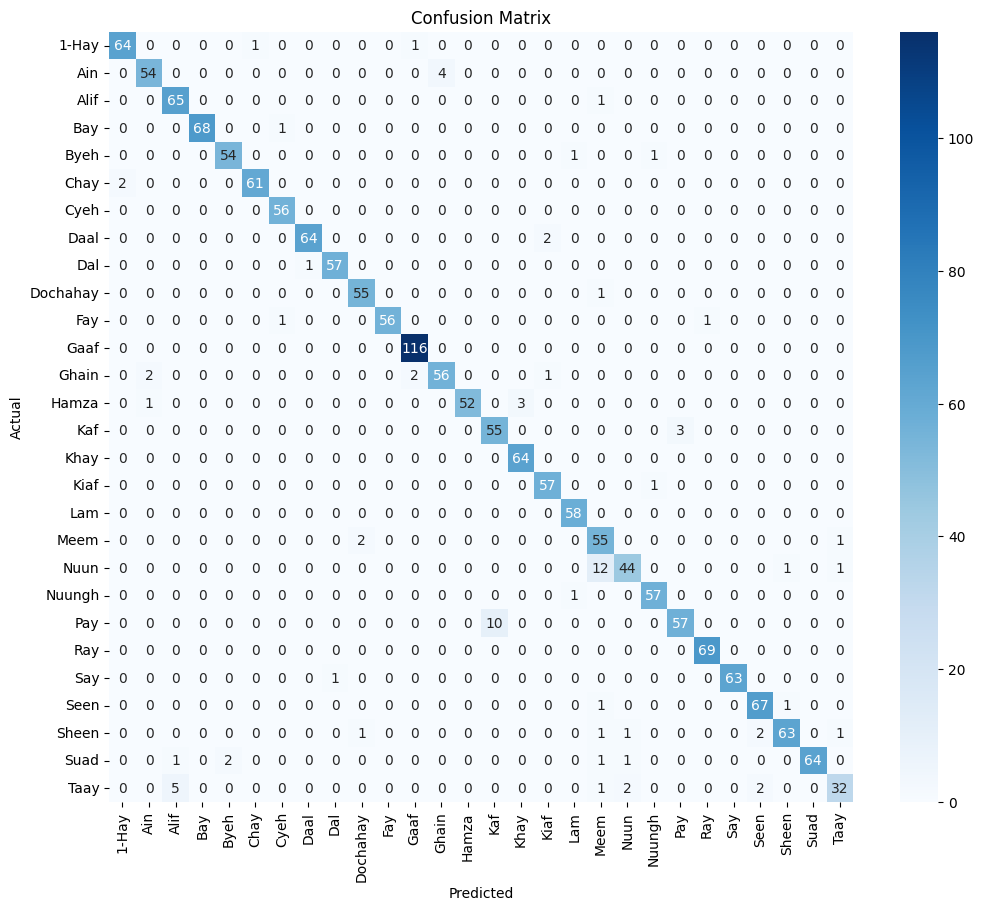

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

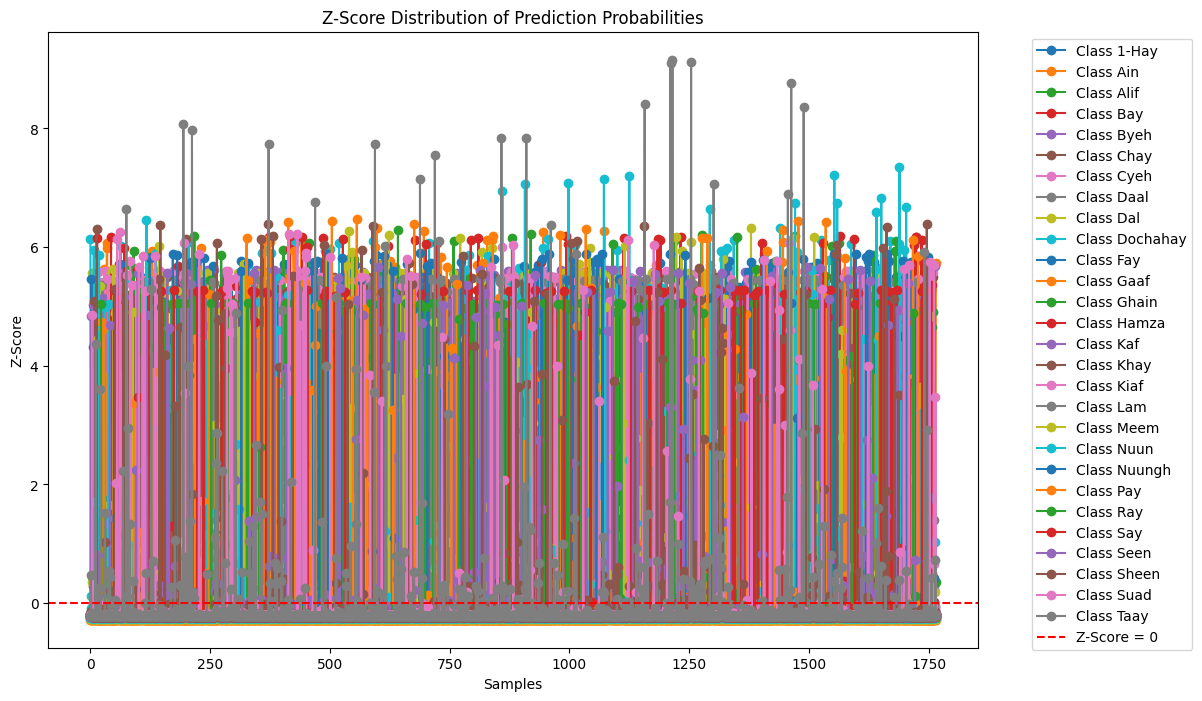

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define constants
DATASET_PATH = r"C:\Users\hp\OneDrive\Desktop\FYP 2021\Pakistan Sign Language Urdu Alphabets"
IMG_SIZE = 224  # Image size for MobileNetV2
BATCH_SIZE = 32

# Get class names
class_names = [directory for directory in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, directory))]

# Split dataset paths and labels into training, validation, and test sets
def get_image_paths_and_labels(dataset_path, class_names):
    image_paths = []
    labels = []
    for idx, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for file_name in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, file_name))
            labels.append(idx)
    return np.array(image_paths), np.array(labels)

# Load image paths and labels
image_paths, labels = get_image_paths_and_labels(DATASET_PATH, class_names)

from sklearn.model_selection import train_test_split

# Split dataset into training, validation, and test sets
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

val_paths, test_paths, val_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)


# Helper function to preprocess data
def preprocess_data(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # Normalize
    return image, label

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_dataset = train_dataset.map(preprocess_data).batch(BATCH_SIZE).shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
val_dataset = val_dataset.map(preprocess_data).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))
test_dataset = test_dataset.map(preprocess_data).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers for the classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(class_names), activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Use sparse if labels are integers
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test dataset
predictions = np.argmax(model.predict(test_dataset), axis=-1)  # Get the class with the highest probability
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Z-Score Graph
probs = np.concatenate([model.predict(x) for x, y in test_dataset])
z_scores = stats.zscore(probs, axis=0)  # Calculate z-scores across the classes
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(class_names):
    plt.plot(z_scores[:, i], label=f'Class {class_name}', marker='o', linestyle='-')
plt.axhline(y=0, color='r', linestyle='--', label='Z-Score = 0')
plt.title('Z-Score Distribution of Prediction Probabilities')
plt.xlabel('Samples')
plt.ylabel('Z-Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [3]:
model.save("sign_language.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Class: Daal


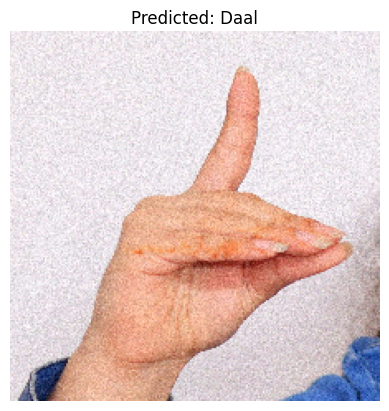

In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Class names corresponding to your new model
class_names = ['1-Hay', 'Ain', 'Alif', 'Bay', 'Byeh', 'Chay', 'Cyeh', 'Daal', 'Dal', 'Dochahay', 'Fay', 'Gaaf', 
               'Ghain', 'Hamza', 'Kaf', 'Khay', 'Kiaf', 'Lam', 'Meem', 'Nuun', 'Nuungh', 'Pay', 'Ray', 'Say', 
               'Seen', 'Sheen', 'Suad', 'Taay', 'Tay', 'Tuey', 'Wao', 'Zaal', 'Zaey', 'Zay', 'Zuad', 'Zuey']

# Path to the test image
img_path = r"C:\Users\hp\OneDrive\Desktop\FYP 2021\Pakistan Sign Language Urdu Alphabets\Daal\s0251-13daal-Generated-255.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class probabilities
pred = model.predict(img_array)

# Decode the prediction result
predicted_class_index = np.argmax(pred, axis=-1)  # Get the index of the highest probability
predicted_class = class_names[predicted_class_index[0]]  # Map index to class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class: Hamza


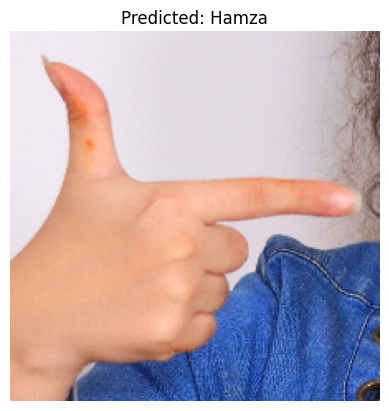

In [6]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Class names corresponding to your new model
class_names = ['1-Hay', 'Ain', 'Alif', 'Bay', 'Byeh', 'Chay', 'Cyeh', 'Daal', 'Dal', 'Dochahay', 'Fay', 'Gaaf', 
               'Ghain', 'Hamza', 'Kaf', 'Khay', 'Kiaf', 'Lam', 'Meem', 'Nuun', 'Nuungh', 'Pay', 'Ray', 'Say', 
               'Seen', 'Sheen', 'Suad', 'Taay', 'Tay', 'Tuey', 'Wao', 'Zaal', 'Zaey', 'Zay', 'Zuad', 'Zuey']

# Path to the test image
img_path = r"C:\Users\hp\OneDrive\Desktop\FYP 2021\Pakistan Sign Language Urdu Alphabets\Hamza\s0251-38hamza-Generated-398.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class probabilities
pred = model.predict(img_array)

# Decode the prediction result
predicted_class_index = np.argmax(pred, axis=-1)  # Get the index of the highest probability
predicted_class = class_names[predicted_class_index[0]]  # Map index to class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
